In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from matplotlib import style
style.use("ggplot")

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
def Build_Data_Set(features = ["DE Ratio",
                               "Trailing P/E"]):
    data_df = pd.DataFrame.from_csv("key_stats.csv")

    data_df = data_df[:100]

    X = np.array(data_df[features].values)
    print(X)

    y = (data_df["Status"]
         .replace("underperform",0)
         .replace("outperform",1)
         .values.tolist())
    print(y)

    return X,y

In [7]:
def Analysis():
    X, y = Build_Data_Set()

    clf = svm.SVC(kernel="linear", C= 1.0)
    clf.fit(X,y)

    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
    yy = a * xx - clf.intercept_[0] / w[1]

    h0 = plt.plot(xx,yy, "k-", label="non weighted")

    plt.scatter(X[:, 0],X[:, 1],c=y)
    plt.ylabel("Trailing P/E")
    plt.xlabel("DE Ratio")
    plt.legend()

    plt.show()

[[  5.43600000e+01   1.61800000e+01]
 [  4.41200000e+01   1.37500000e+01]
 [  5.63900000e+01   1.77400000e+01]
 [  5.95000000e-01   2.49200000e+01]
 [  5.61000000e-01   2.08800000e+01]
 [  5.30000000e-01   2.11500000e+01]
 [  5.30000000e-01   2.06900000e+01]
 [  4.57000000e-01   1.84300000e+01]
 [  4.57000000e-01   1.83900000e+01]
 [  4.82600000e+01   1.37800000e+01]
 [  5.09300000e+01   1.12300000e+01]
 [  5.09300000e+01   1.14700000e+01]
 [  5.09300000e+01   9.08000000e+00]
 [  5.52800000e+01   2.31000000e+01]
 [  5.32100000e+01   3.62100000e+01]
 [  5.32100000e+01   3.69200000e+01]
 [  2.92100000e+00   6.37000000e+01]
 [  2.91700000e+00   5.44000000e+01]
 [  2.91700000e+00   6.92800000e+01]
 [  2.63200000e+00   8.84100000e+01]
 [  2.58100000e+00   5.78300000e+01]
 [  2.58100000e+00   6.25500000e+01]
 [  2.58100000e+00   7.20100000e+01]
 [  1.37500000e+01   1.13300000e+01]
 [  5.12610000e+02   1.28800000e+01]
 [  4.29000000e-01   1.41000000e+01]
 [  4.12000000e-01   1.40500000e+01]
 

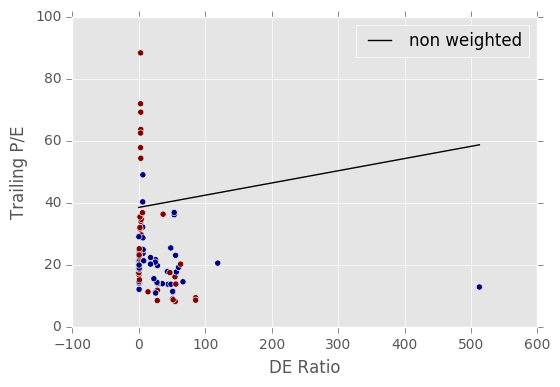

In [8]:
Analysis()